## Linear Regression Methods

This is a very simple example of using two scipy tools for linear regression.

-Scipy.Polyfit

-Stats.linregress

-Optimize.curve_fit

-numpy.linalg.lstsq

-statsmodels.OLS

-Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse

-sklearn.linear_model.LinearRegression

### Import libraries

In [2]:
from scipy import linspace,polyval,polyfit,sqrt,stats,randn,optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

### Generate random data of a sufficiently large size

In [3]:
#Sample data creation number of points
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.24;
b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

### Draw few random sample points and plot

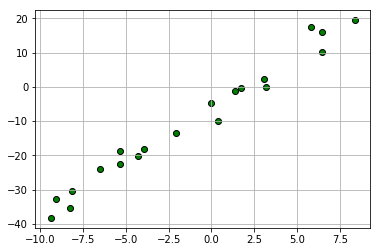

In [4]:

xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

### Method: Scipy.Polyfit

In [5]:

#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.24 b=-6.50, ms error= 3.001
Time taken: 2.250742197036743 seconds


### Method: Stats.linregress

In [6]:
#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.24 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.33379387855529785 seconds


### Method: Optimize.curve_fit

In [7]:
def flin(t,a,b):
    result=a*t+b
    return(result)

In [8]:

t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.24 b=-6.50
Time taken: 2.015582799911499 seconds


### Method: numpy.linalg.lstsq

In [9]:
t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.24 b=-6.50, ms error= 3.001
Time taken: 0.4632070064544678 seconds


### Method: Statsmodels.OLS

In [10]:
t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))
print(results.summary())

Linear regression using statsmodels.OLS
parameters: a=3.24 b=-6.50
Time taken: 1.919212818145752 seconds
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.860e+36
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:19:09   Log-Likelihood:             1.5135e+08
No. Observations:             5000000   AIC:                        -3.027e+08
Df Residuals:                 4999998   BIC:                        -3.027e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Analytic solution using Moore-Penrose pseudoinverse

In [11]:
t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.24 b=-6.50
Time taken: 1.0252203941345215 seconds


### Analytic solution using simple multicative matrix

In [12]:

t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.24 b=-6.50
Time taken: 0.26719212532043457 seconds


### Method: sklearn.linear_model.LinearRegression

In [13]:
t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.24 b=-6.50
Time taken: 0.9836077690124512 seconds


### Bucket all the execution times in a list and plot

In [14]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

TypeError: bar() missing 1 required positional argument: 'x'

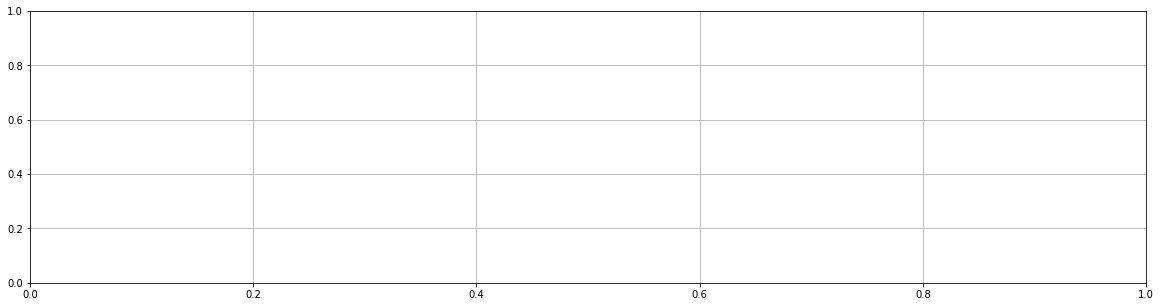

In [15]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()